In [1]:
import numpy as np
import matplotlib.pyplot as plt

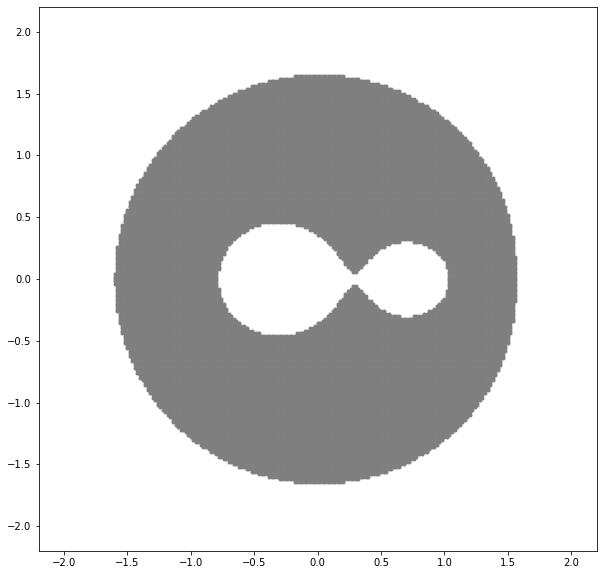

In [43]:
#Setup of variables
mu = 0.3
C = 3.85
N = 201

#Potential function Omega
def Omega(x,y):
    rho1 = np.sqrt((x+mu)**2 + y**2)
    rho2 = np.sqrt((x+mu-1)**2 + y**2)
    if rho1 == 0 or rho2 == 0:
        return 1000
    else:
        mega = 1/2 * (x**2+y**2) + (1-mu)/rho1 + mu/rho2
        return mega

#Create arrays to be sampled over
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)

#Plot the points the Satellite cannot move in
plt.figure(figsize=(10,10))
for i in range(N):
    for j in range(N):
        if Omega(x[i],y[j]) < 1/2 * C:
            plt.plot(x[i],y[j], color = 'tab:gray', marker = 'o', markersize = 3)
            
plt.xlim(-2.2,2.2)
plt.ylim(-2.2,2.2)
plt.show()

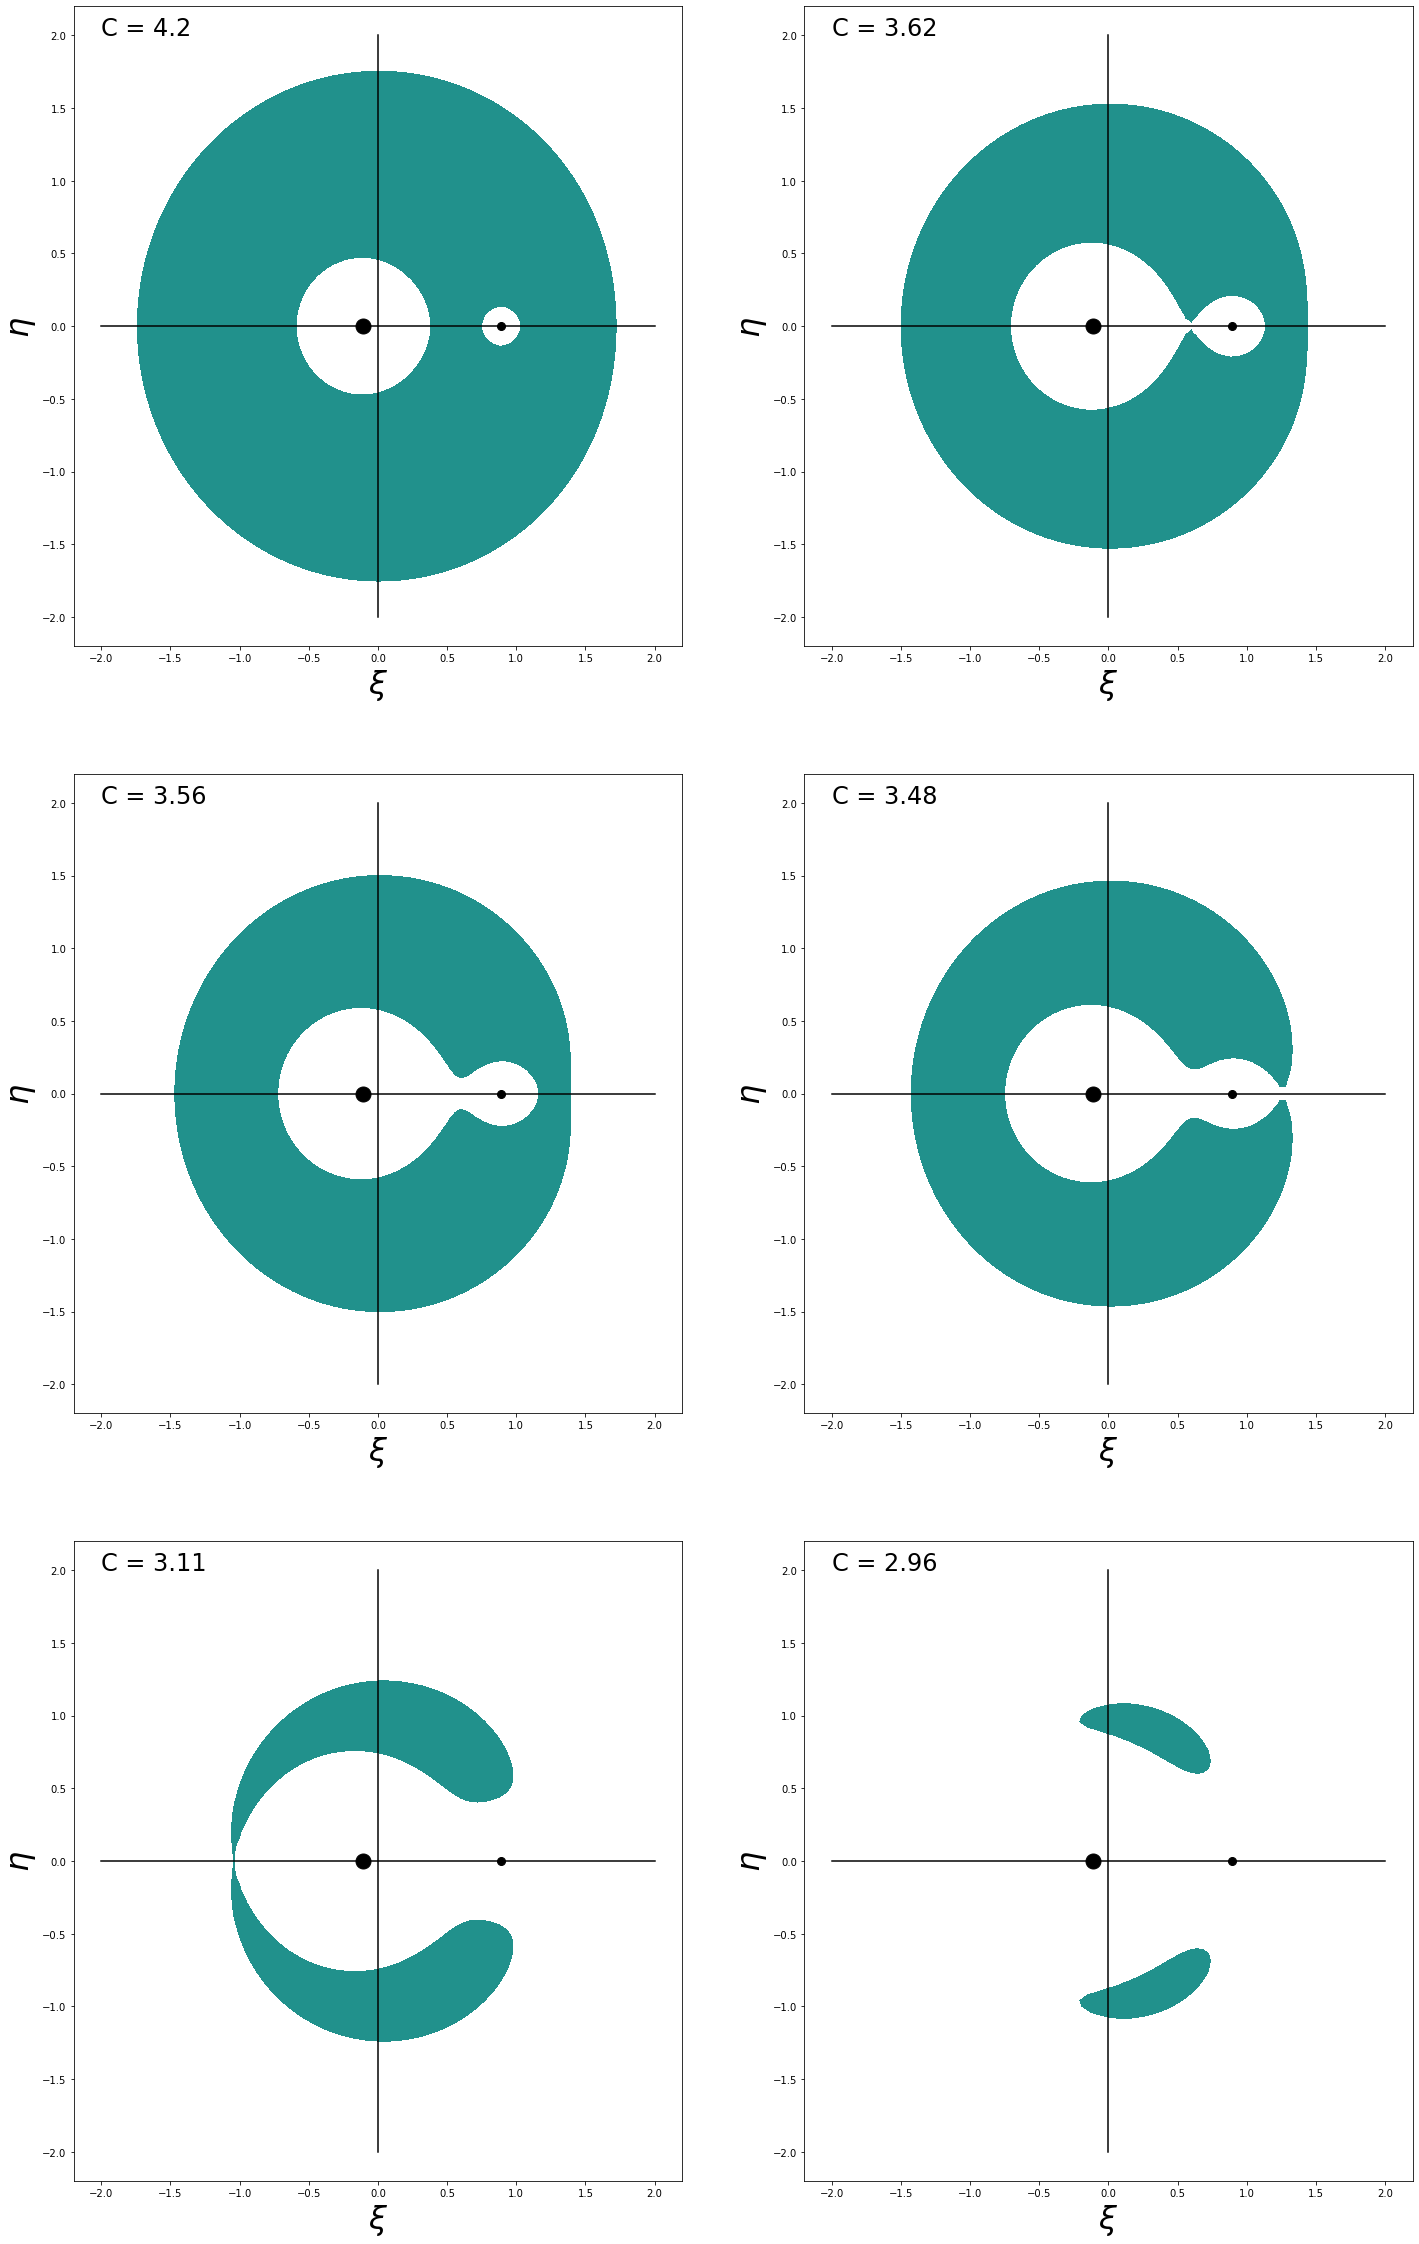

In [218]:
#Setup of variables
mu = 0.11
N = 101

#All the cs
C = [4.20, 3.62, 3.56, 3.48, 3.11, 2.96]

#Potential function Omega
def Omega(x,y):
    rho1 = np.sqrt((x+mu)**2 + y**2)
    rho2 = np.sqrt((x+mu-1)**2 + y**2)
    if rho1 == 0 or rho2 == 0:
        return 10
    else:
        mega = 1/2 * (x**2+y**2) + (1-mu)/rho1 + mu/rho2
        
    if mega >=10:
        return 10
    else:
        return mega

#Create arrays to be sampled over
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        z[i][j] = Omega(x[j],y[i])

        
def plot(C):
    #Contour plots
    plt.contourf(x, y, z, levels = [0, 1/2*C], cmap='viridis')

    plt.plot(x,np.zeros(N), color = 'k')
    plt.plot(np.zeros(N),y, color = 'k')
    plt.plot(1-mu, 0, color = 'k', marker = 'o', markersize = 8)
    plt.plot(-mu, 0, color = 'k', marker = 'o', markersize = 15)

    plt.xlim(-2.2,2.2)
    plt.ylim(-2.2,2.2)
    plt.xlabel(r"$\xi$", fontsize = 32)
    plt.ylabel(r"$\eta$", fontsize = 32)
    thing = "C = " + str(C)
    plt.annotate(thing, xy = (-2.0, 2.0),fontsize = 24)

#Plotting everything
plt.figure(figsize=(24,40))
plt.subplot(3,2,1)
plot(C[0])
plt.subplot(3,2,2)
plot(C[1])

plt.subplot(3,2,3)
plot(C[2])
plt.subplot(3,2,4)
plot(C[3])

plt.subplot(3,2,5)
plot(C[4])
plt.subplot(3,2,6)
plot(C[5])
plt.savefig("Jacobi.jpg")
plt.show()